In [2]:
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
data = image_dataset_from_directory("gdrive/MyDrive/waiste data", 
                             labels='inferred', label_mode='categorical', class_names=None, color_mode='rgb',
                             batch_size=32, image_size=(32, 32), shuffle=True, seed=None,
                             validation_split=None, subset=None, interpolation='bilinear', follow_links=False,
                             crop_to_aspect_ratio=False)

Found 22610 files belonging to 10 classes.


In [5]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

data_norm = data.map(process)

In [6]:
data_sample = data.take(50)

data_im = []
data_lb = []

for im, lb in data_sample:
  data_im.append(im)
  data_lb.append(lb)

In [21]:
def norma_2(image):
  image = tf.cast(image/255, tf.float32)
  return image

In [22]:
data_im_2 = [norma_2(image) for image in data_im]

In [23]:
data_im_2 = np.array(data_im_2)
data_lb = np.array(data_lb)

In [24]:
data_im_2 = data_im_2.reshape(-1, 32, 32, 3)
data_lb = data_lb.reshape(-1, 10)

In [33]:
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
 

In [34]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", patience = 10, restore_best_weights = True)

In [60]:
model = define_model()

In [61]:
history = model.fit(data_im_2, data_lb, epochs=100, validation_split = 0.2, verbose=1, callbacks = [es])

Epoch 1/100
40/40 [==============================] - 12s 270ms/step - loss: 3.1495 - accuracy: 0.1516 - val_loss: 2.3225 - val_accuracy: 0.1437
Epoch 2/100
40/40 [==============================] - 11s 263ms/step - loss: 2.8363 - accuracy: 0.2031 - val_loss: 2.3810 - val_accuracy: 0.1375
Epoch 3/100
40/40 [==============================] - 11s 263ms/step - loss: 2.5156 - accuracy: 0.2398 - val_loss: 2.3982 - val_accuracy: 0.2250
Epoch 4/100
40/40 [==============================] - 11s 263ms/step - loss: 2.3420 - accuracy: 0.2875 - val_loss: 2.4668 - val_accuracy: 0.2000
Epoch 5/100
40/40 [==============================] - 10s 262ms/step - loss: 2.1465 - accuracy: 0.3273 - val_loss: 2.3921 - val_accuracy: 0.2062
Epoch 6/100
40/40 [==============================] - 11s 263ms/step - loss: 2.0826 - accuracy: 0.3289 - val_loss: 2.2452 - val_accuracy: 0.2969
Epoch 7/100
40/40 [==============================] - 11s 263ms/step - loss: 2.0175 - accuracy: 0.3438 - val_loss: 2.1604 - val_accuracy:

In [62]:
def summarize_diagnostics(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

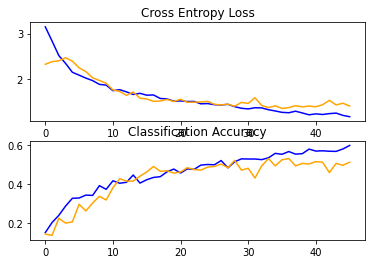

In [63]:
summarize_diagnostics(history)